In [11]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn import metrics



diabetes = load_diabetes()
X = diabetes.data

In [12]:
from sklearn.preprocessing import StandardScaler
 
#标准化，返回值为标准化后的数据
StandardScaler().fit_transform(X)

array([[ 0.80050009,  1.06548848,  1.29708846, ..., -0.05449919,
         0.41855058, -0.37098854],
       [-0.03956713, -0.93853666, -1.08218016, ..., -0.83030083,
        -1.43655059, -1.93847913],
       [ 1.79330681,  1.06548848,  0.93453324, ..., -0.05449919,
         0.06020733, -0.54515416],
       ...,
       [ 0.87686984,  1.06548848, -0.33441002, ..., -0.23293356,
        -0.98558469,  0.32567395],
       [-0.9560041 , -0.93853666,  0.82123474, ...,  0.55838411,
         0.93615545, -0.54515416],
       [-0.9560041 , -0.93853666, -1.53537419, ..., -0.83030083,
        -0.08871747,  0.06442552]])

In [13]:
from sklearn.preprocessing import MinMaxScaler
 
#区间缩放，返回值为缩放到[0, 1]区间的数据
MinMaxScaler().fit_transform(X)

array([[0.66666667, 1.        , 0.58264463, ..., 0.28208745, 0.56221737,
        0.43939394],
       [0.48333333, 0.        , 0.14876033, ..., 0.14104372, 0.22244301,
        0.16666667],
       [0.88333333, 1.        , 0.51652893, ..., 0.28208745, 0.49658437,
        0.40909091],
       ...,
       [0.68333333, 1.        , 0.28512397, ..., 0.24964739, 0.30504048,
        0.56060606],
       [0.28333333, 0.        , 0.49586777, ..., 0.39351199, 0.65702021,
        0.40909091],
       [0.28333333, 0.        , 0.0661157 , ..., 0.14104372, 0.46930778,
        0.51515152]])

In [14]:
from sklearn.preprocessing import Normalizer

#归一化，返回值为归一化后的数据
Normalizer().fit_transform(X)

array([[ 0.32100597,  0.42726811,  0.52014127, ..., -0.02185454,
         0.16784162, -0.14876892],
       [-0.01166166, -0.27661579, -0.31895198, ..., -0.24471534,
        -0.4233959 , -0.57132977],
       [ 0.6574065 ,  0.39059633,  0.34258958, ..., -0.0199788 ,
         0.02207134, -0.1998475 ],
       ...,
       [ 0.42500219,  0.51642207, -0.1620822 , ..., -0.11289848,
        -0.47769422,  0.15784799],
       [-0.4486945 , -0.44049627,  0.38544135, ...,  0.26207406,
         0.43937866, -0.25586467],
       [-0.19283439, -0.18931106, -0.30969841, ..., -0.16747894,
        -0.01789509,  0.01299519]])

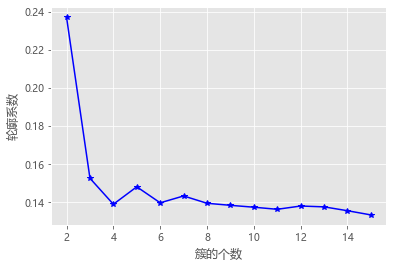

In [15]:
# 构造自定义函数，用于绘制不同k值和对应轮廓系数的折线图
def k_silhouette(X, clusters):
    K = range(2,clusters+1)
    # 构建空列表，用于存储个中簇数下的轮廓系数
    S = []
    for k in K:
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(X)
        labels = kmeans.labels_
        # 调用字模块metrics中的silhouette_score函数，计算轮廓系数
        S.append(metrics.silhouette_score(X, labels, metric='euclidean'))

    # 中文和负号的正常显示
    plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
    plt.rcParams['axes.unicode_minus'] = False
    # 设置绘图风格
    plt.style.use('ggplot')    
    # 绘制K的个数与轮廓系数的关系
    plt.plot(K, S, 'b*-')
    plt.xlabel('簇的个数')
    plt.ylabel('轮廓系数')
    # 显示图形
    plt.show()
    
# 自定义函数的调用
k_silhouette(X, 15)

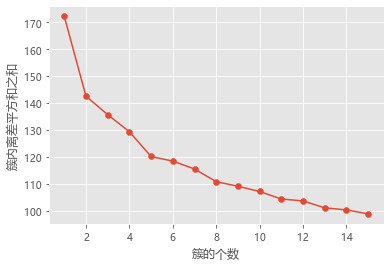

In [16]:
distance = []
k = []
#簇的数量
for n_clusters in range(1,16):
    cls = KMeans(n_clusters).fit(X)

    #曼哈顿距离
    def manhattan_distance(x,y):
        return np.sum(abs(x-y))

    distance_sum = 0
    for i in range(n_clusters):
        group = cls.labels_ == i
        members = X[group,:]
        for v in members:
            distance_sum += manhattan_distance(np.array(v), cls.cluster_centers_[i])
    distance.append(distance_sum)
    k.append(n_clusters)
plt.scatter(k, distance)
plt.plot(k, distance)
plt.xlabel("簇的个数")
plt.ylabel("簇内离差平方和之和")
plt.show()

In [17]:
# 构建Kmeans模型
kmeans = KMeans(n_clusters = 2)
kmeans.fit(X)
# 聚类结果标签
kmeans.labels_

array([1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,

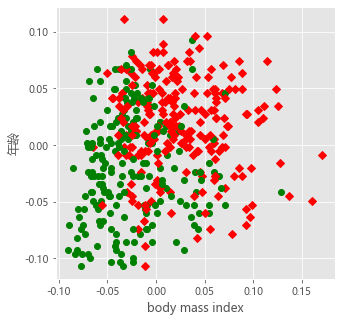

In [18]:
plt.figure(figsize=(5,5)) 
colors = [ 'g', 'r'] 
markers = ['o', 'D']
for i,l in enumerate(kmeans.labels_): 
     plt.plot(X[i][2],X[i][0],color=colors[l],marker=markers[l],ls='None') 
plt.xlabel("身体混乱指数")
plt.ylabel("年龄")
plt.show()

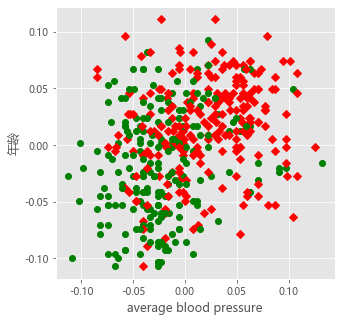

In [20]:
plt.figure(figsize=(5,5)) 
colors = [ 'g', 'r'] 
markers = ['o', 'D']
for i,l in enumerate(kmeans.labels_): 
     plt.plot(X[i][3],X[i][0],color=colors[l],marker=markers[l],ls='None') 
plt.xlabel("平均血压")
plt.ylabel("年龄")
plt.show()